In [ ]:
#some test with rnn

In [3]:
import numpy as np
rain_list=[] #0 - sun, 1 rain
rain_list.append(0)
for i in range(10**5):
    r=np.random.rand()
    if r>0.8:
        rain_list.append(np.abs(1-rain_list[i]))
    else:
        rain_list.append(rain_list[i])
rain_list=np.array(rain_list)

### linear model

In [42]:
rain_list_train=rain_list[:80000]
rain_list_test=rain_list[80000:]

In [43]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(np.expand_dims(rain_list_train,1),np.roll(rain_list_train,-1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
pred=model.predict(np.expand_dims(rain_list_test,1))

In [47]:
pred[:10]

array([ 0.19731377,  0.19731377,  0.19731377,  0.19731377,  0.19731377,
        0.19731377,  0.19731377,  0.19731377,  0.19731377,  0.80065335])

In [51]:
from sklearn.metrics import mean_squared_error,log_loss

In [57]:
mean_squared_error(np.roll(rain_list_test,-1),pred)

0.16223223033553025

In [56]:
log_loss(np.roll(rain_list_test,-1),pred)

0.50557519751169278

### rnn

In [66]:
from keras.layers.recurrent import Recurrent,LSTM
from keras.models import Sequential
from keras.layers import Dense

In [72]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_4 (LSTM)                    (None, 4)             128         lstm_input_3[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             5           lstm_4[0][0]                     
Total params: 133
Trainable params: 133
Non-trainable params: 0
____________________________________________________________________________________________________


In [76]:
# as the first layer in a Sequential model
model = Sequential()
model.add(LSTM(1, input_dim=2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

In [77]:
model.fit(np.expand_dims(rain_list_train,1),np.roll(rain_list_train,-1), nb_epoch=100, batch_size=1, verbose=2)

ValueError: Error when checking model input: expected lstm_input_5 to have 3 dimensions, but got array with shape (80000, 1)

### tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import tempfile

In [3]:

sequences = [[1, 2, 3], [4, 5, 1], [1, 2]]
label_sequences = [[0, 1, 0], [1, 0, 0], [1, 1]]

def make_example(sequence, labels):
    # The object we return
    ex = tf.train.SequenceExample()
    # A non-sequential feature of our example
    sequence_length = len(sequence)
    ex.context.feature["length"].int64_list.value.append(sequence_length)
    # Feature lists for the two sequential features of our example
    fl_tokens = ex.feature_lists.feature_list["tokens"]
    fl_labels = ex.feature_lists.feature_list["labels"]
    for token, label in zip(sequence, labels):
        fl_tokens.feature.add().int64_list.value.append(token)
        fl_labels.feature.add().int64_list.value.append(label)
    return ex

# Write all examples into a TFRecords file
with tempfile.NamedTemporaryFile() as fp:
    writer = tf.python_io.TFRecordWriter(fp.name)
    for sequence, label_sequence in zip(sequences, label_sequences):
        ex = make_example(sequence, label_sequence)
        writer.write(ex.SerializeToString())
    writer.close()
    print("Wrote to {}".format(fp.name))

Wrote to /tmp/tmpdnvq1v4p


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
  if sys.path[0] == '':
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
  del sys.path[0]


In [4]:

tf.reset_default_graph()

# A single serialized example
# (You can read this from a file using TFRecordReader)
ex = make_example([1, 2, 3], [0, 1, 0]).SerializeToString()

# Define how to parse the example
context_features = {
    "length": tf.FixedLenFeature([], dtype=tf.int64)
}
sequence_features = {
    "tokens": tf.FixedLenSequenceFeature([], dtype=tf.int64),
    "labels": tf.FixedLenSequenceFeature([], dtype=tf.int64)
}

# Parse the example (returns a dictionary of tensors)
context_parsed, sequence_parsed = tf.parse_single_sequence_example(
    serialized=ex,
    context_features=context_features,
    sequence_features=sequence_features
)

context = tf.contrib.learn.run_n(context_parsed, n=1, feed_dict=None)
print(context[0])
sequence = tf.contrib.learn.run_n(sequence_parsed, n=1, feed_dict=None)
print(sequence[0])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
  # Remove the CWD from sys.path while we load stuff.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
  if sys.path[0] == '':
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
  del sys.path[0]


Instructions for updating:
graph_actions.py will be deleted. Use tf.train.* utilities instead. You can use learn/estimators/estimator.py as an example.
Instructions for updating:
graph_actions.py will be deleted. Use tf.train.* utilities instead. You can use learn/estimators/estimator.py as an example.
Instructions for updating:
graph_actions.py will be deleted. Use tf.train.* utilities instead. You can use learn/estimators/estimator.py as an example.
{'length': 3}
Instructions for updating:
graph_actions.py will be deleted. Use tf.train.* utilities instead. You can use learn/estimators/estimator.py as an example.
Instructions for updating:
graph_actions.py will be deleted. Use tf.train.* utilities instead. You can use learn/estimators/estimator.py as an example.
Instructions for updating:
graph_actions.py will be deleted. Use tf.train.* utilities instead. You can use learn/estimators/estimator.py as an example.
{'labels': array([0, 1, 0]), 'tokens': array([1, 2, 3])}


## pytorch

### intro

In [1]:
from __future__ import print_function
import torch

In [2]:
x=torch.Tensor(5,3)
x = torch.rand(5, 3)

In [3]:
y = torch.rand(5, 3)

In [4]:
torch.from_numpy(x.numpy())


 0.6700  0.1383  0.0409
 0.1677  0.0699  0.2838
 0.0131  0.6420  0.8879
 0.4180  0.8914  0.5995
 0.9887  0.4028  0.8592
[torch.FloatTensor of size 5x3]

In [6]:
import numpy as np
np.sum(x.numpy())

7.0730543

In [2]:
torch.cuda.is_available()

RuntimeError: cuda runtime error (30) : unknown error at torch/csrc/cuda/Module.cpp:109

In [4]:
import keras

In [5]:
keras.backend.backend()

'tensorflow'

In [3]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

RuntimeError: cuda runtime error (30) : unknown error at torch/csrc/cuda/Module.cpp:109

### autograd

In [110]:
import torch
from torch.autograd import Variable

In [43]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [44]:
y=x+2

In [45]:
z = y * y * 3
out = z.mean()

In [46]:
print(out)

Variable containing:
 27
[torch.FloatTensor of size 1]



In [47]:
out.backward()

In [48]:
print(y.grad)

None


In [51]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
 -329.9767
  651.1246
-1114.6263
[torch.FloatTensor of size 3]



In [53]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



In [111]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

In [112]:
x

Variable containing:
-1.2606
 0.8750
 0.2492
[torch.FloatTensor of size 3]

In [126]:
y=x**2

In [127]:
z=y.sum()

In [128]:
z.backward()

In [129]:
z

Variable containing:
 2.4169
[torch.FloatTensor of size 1]

In [130]:
x.grad

Variable containing:
-7.5638
 5.2501
 1.4951
[torch.FloatTensor of size 3]

In [108]:
-2.9911/-0.4985

6.000200601805416

### nn

In [131]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [207]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (256 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [166]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) 

10
torch.Size([6, 1, 5, 5])


In [187]:
28*28,32*32

(784, 1024)

In [208]:
input = Variable(torch.randn(3, 1, 28, 28))
out = net(input)
print(out)

Variable containing:
 0.0224 -0.0229  0.1646 -0.0344 -0.0471  0.0386  0.0610 -0.0741  0.0631 -0.0495
 0.0472 -0.0227  0.1533 -0.0650 -0.0329  0.0077  0.0905 -0.1065  0.0866 -0.0205
 0.0368  0.0054  0.1428 -0.0627 -0.0483  0.0017  0.0544 -0.0666  0.0526 -0.0294
[torch.FloatTensor of size 3x10]



In [159]:
target

Variable containing:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
[torch.FloatTensor of size 10]

In [174]:
output = net(input)
target = Variable(torch.range(1, 10))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.7794
[torch.FloatTensor of size 1]



In [176]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]



RuntimeError: Trying to backward through the graph second time, but the buffers have already been freed. Please specify retain_variables=True when calling backward for the first time.

In [181]:
for i in net.parameters():
    print (i.size())

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [182]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [183]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()  

### pytorch classifier

In [184]:
import torch
import torchvision
import torchvision.transforms as transforms

In [272]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


horse   dog  deer truck


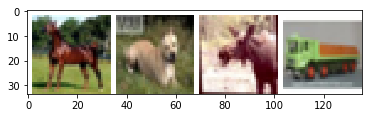

Process Process-254:
Process Process-253:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 26, in _worker_loop
    r = index_queue.get()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._

In [273]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [278]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [279]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [220]:
net.cuda()

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [281]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.205


Process Process-261:


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Process Process-262:
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 26, in _worker_loop
    r = index_queue.get()
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 26, in _worker_loop
    r = index_queue.get()
  File "/home

In [206]:
criterion(outputs, labels)

Variable containing:
 4.0479
[torch.FloatTensor of size 1]

In [204]:
outputs

Variable containing:
-1.3203  0.6418 -0.4626  0.7698 -0.0729  0.2540  0.8599  0.8305 -1.1337  0.6720
-0.7581 -1.5817  1.0645  0.7278  1.3383  1.0128  0.6740  1.2237 -1.8021 -1.6680
-1.3428  1.4130 -0.6559  0.3864 -0.0749 -0.2926  0.8797  0.8550 -1.4503  0.6539
 0.4874  4.5986 -1.8301 -0.6993 -1.5380 -1.9492 -1.2892 -0.7346  2.0686  2.6974
[torch.FloatTensor of size 4x10]

In [205]:
labels

Variable containing:
 7
 8
 8
 3
[torch.LongTensor of size 4]

### reinforcment learning

In [225]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from copy import deepcopy
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
import torchvision.transforms as T

env = gym.make('CartPole-v0').unwrapped

is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

[2017-04-20 13:57:55,855] Making new env: CartPole-v0


In [226]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [227]:
class DQN(nn.Module):

    def __init__(self):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)
        self.head = nn.Linear(448, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

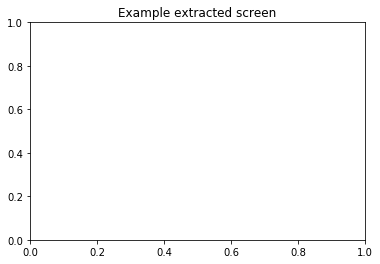

In [229]:
resize = T.Compose([T.ToPILImage(),
                    T.Scale(40, interpolation=Image.CUBIC),
                    T.ToTensor()])

# This is based on the code from gym.
screen_width = 600


def get_cart_location():
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART


def get_screen():
    screen = env.render(mode='rgb_array').transpose(
        (2, 0, 1))  # transpose into torch order (CHW)
    # Strip off the top and bottom of the screen
    screen = screen[:, 160:320]
    view_width = 320
    cart_location = get_cart_location()
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, slice_range]
    # Convert to float, rescare, convert to torch tensor
    # (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0)

env.reset()
plt.figure()
#plt.imshow(get_screen().squeeze(0).permute(1, 2, 0).numpy(), interpolation='none')
plt.title('Example extracted screen')
plt.show()

### transfer learning

http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os

plt.ion()   # interactive mode

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
dsets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
         for x in ['train', 'val']}
dset_loaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=4,
                                               shuffle=True, num_workers=4)
                for x in ['train', 'val']}
dset_sizes = {x: len(dsets[x]) for x in ['train', 'val']}
dset_classes = dsets['train'].classes

use_gpu = torch.cuda.is_available()

In [163]:
os.path.join(data_dir, 'train')

'hymenoptera_data/train'

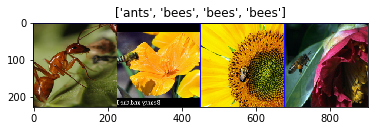

In [3]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

%matplotlib inline
# Get a batch of training data
inputs, classes = next(iter(dset_loaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[dset_classes[x] for x in classes])

In [90]:
def train_model(model, criterion, optimizer, lr_scheduler,data_set, num_epochs=25):
    since = time.time()

    best_model = model
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                optimizer = lr_scheduler(optimizer, epoch)
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in data_set[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if use_gpu:
                    inputs, labels = Variable(inputs.cuda()),Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dset_sizes[phase]
            epoch_acc = running_corrects / dset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    return best_model

In [5]:
 def exp_lr_scheduler(optimizer, epoch, init_lr=0.001, lr_decay_epoch=7):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""
    lr = init_lr * (0.1**(epoch // lr_decay_epoch))

    if epoch % lr_decay_epoch == 0:
        print('LR is set to {}'.format(lr))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    return optimizer

In [17]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure( figsize=(16, 12))

    for i, data in enumerate(dset_loaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(dset_classes[labels.data[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                return

In [132]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

if use_gpu:
    model_ft = model_ft.cuda()
    
criterion = nn.CrossEntropyLoss()

In [12]:
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

In [91]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,dset_loaders,
                       num_epochs=25)

Epoch 0/24
----------
LR is set to 0.001
train Loss: 0.0880 Acc: 0.8525
val Loss: 0.0581 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.0484 Acc: 0.9303


Process Process-235:
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
Process Process-236:
Process Process-233:
Process Process-234:
Traceback (most recent call last):


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 26, in _worker_loop
    r = index_queue.get()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/ubuntu/anacond

In [147]:
for i in dset_loaders['val']:
    break

In [45]:
v=Variable(torch.from_numpy(i[0].numpy()[:2]).cuda())

In [63]:
inp=i[0].numpy()[0].swapaxes(0,-1)

In [65]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])


In [66]:
inp = std * inp + mean

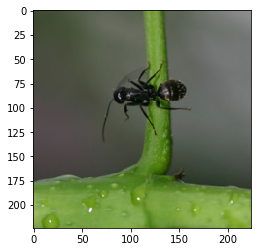

In [67]:
plt.imshow(inp)

#### now with freeze

In [68]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

if use_gpu:
    model_conv = model_conv.cuda()

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opoosed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

### kaggle mnist

In [70]:
#read data
#preprocess (shitty)data
#fine tune model
import pandas as pd
train=pd.read_csv('/mnt/mnist_kaggle/train.csv')

In [73]:
np_train=train.as_matrix()

In [104]:
np_train[:,0]

array([1, 0, 1, ..., 7, 6, 9])

In [84]:
np_train.shape

(42000, 785)

In [86]:
np_train_reshaped=np_train[:,1:].reshape(42000,28,28)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,dset_loaders,
                       num_epochs=25)

In [194]:
mnist_train_tensor=torch.from_numpy(np_train_reshaped.reshape(42000,1,28,28).astype('float32'))

In [120]:
mnist_loader={}


In [301]:
np_labels=(np_train[:,0])

In [252]:
def generate_mnist():
    i = 0
    while i < 10500:
        yield mnist_train_tensor[i*4:i*4+4],torch.from_numpy(np_labels[i*4:i*4+4])
        i += 1

In [239]:
from keras.utils.np_utils import to_categorical

In [109]:
def train_model_mnist(model, criterion, optimizer, lr_scheduler,mnist_loader, num_epochs=25):
    since = time.time()

    best_model = model
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                optimizer = lr_scheduler(optimizer, epoch)
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in data_set[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if use_gpu:
                    inputs, labels = Variable(inputs.cuda()),Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dset_sizes[phase]
            epoch_acc = running_corrects / dset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    return best_model

In [296]:
for i, data in enumerate(mnist_loader['train'],0):
    break

In [157]:
train_model(net, criterion, optimizer_ft, exp_lr_scheduler,mnist_loader,
                       num_epochs=25)

Epoch 0/24
----------
LR is set to 0.001


AssertionError: 

In [265]:
i=0
torch.from_numpy(np_train[0,i:i+4])


 1
 0
 0
 0
[torch.LongTensor of size 4]

In [308]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [319]:
mnist_loader['train']=generate_mnist()

In [320]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects=0.0
    
    for i, data in enumerate(mnist_loader['train'],0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        running_corrects += torch.sum(preds == labels.data)
        
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            epoch_acc = running_corrects/8000
            print(epoch_acc)        
            
            running_corrects=0.0
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.213
0.952375
[1,  4000] loss: 0.202
0.956
[1,  6000] loss: 0.175
0.958375
[1,  8000] loss: 0.216
0.952125
[1, 10000] loss: 0.210
0.957
Finished Training


In [307]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### basic nlp

In [322]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [324]:
data = [("me gusta comer en la cafeteria".split(), "SPANISH"),
        ("Give it to me".split(), "ENGLISH"),
        ("No creo que sea una buena idea".split(), "SPANISH"),
        ("No it is not a good idea to get lost at sea".split(), "ENGLISH")]

test_data = [("Yo creo que si".split(), "SPANISH"),
             ("it is lost on me".split(), "ENGLISH")]

# word_to_ix maps each word in the vocab to a unique integer, which will be its
# index into the Bag of words vector
word_to_ix = {}
for sent, _ in data + test_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)

VOCAB_SIZE = len(word_to_ix)
NUM_LABELS = 2

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22, 'Yo': 23, 'si': 24, 'on': 25}


In [335]:
class BoWClassifier(nn.Module):
    
    def __init__(self, num_labels, vocab_size):
        super(BoWClassifier,self).__init__()
        
        self.linear= nn.Linear(vocab_size,num_labels)
        
    def forward(self,bow_vec):
        x=self.linear(bow_vec)
        return F.log_softmax(x)
        

In [329]:
def make_bow_vector(sentence, word_to_ix):
    vec = torch.zeros(len(word_to_ix))
    for word in sentence:
        vec[word_to_ix[word]] += 1
    return vec.view(1, -1)


def make_target(label, label_to_ix):
    return torch.LongTensor([label_to_ix[label]])

In [336]:
model = BoWClassifier(NUM_LABELS, VOCAB_SIZE)

In [337]:
for param in model.parameters():
    print(param)

Parameter containing:

Columns 0 to 9 
-0.0073  0.0156  0.1193 -0.1233  0.1426  0.1229 -0.0167 -0.0360 -0.1762  0.1424
 0.0329  0.0594 -0.0535  0.1645  0.0402 -0.1615  0.1640  0.0319  0.1925 -0.0432

Columns 10 to 19 
-0.1905 -0.0367  0.1322  0.0250  0.0011 -0.1892  0.0571 -0.1413 -0.1059 -0.0515
-0.0939  0.0526 -0.0153  0.1130 -0.1526  0.0221  0.0956 -0.0362  0.0162 -0.1626

Columns 20 to 25 
 0.0381 -0.0192  0.0411  0.0854  0.0937  0.0313
-0.0353 -0.0865 -0.0305 -0.0267 -0.0172  0.1723
[torch.FloatTensor of size 2x26]

Parameter containing:
 0.1368
 0.0505
[torch.FloatTensor of size 2]



In [338]:
sample = data[0]
bow_vector = make_bow_vector(sample[0], word_to_ix)
log_probs = model(autograd.Variable(bow_vector))
print(log_probs)

Variable containing:
-0.5655 -0.8395
[torch.FloatTensor of size 1x2]



In [340]:
label_to_ix = {"SPANISH": 0, "ENGLISH": 1}

In [339]:
for instance, label in test_data:
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    print(log_probs)

Variable containing:
-0.6334 -0.7567
[torch.FloatTensor of size 1x2]

Variable containing:
-0.7624 -0.6283
[torch.FloatTensor of size 1x2]



In [341]:
print(next(model.parameters())[:, word_to_ix["creo"]])

Variable containing:
-0.1905
-0.0939
[torch.FloatTensor of size 2]



In [342]:
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [350]:
autograd.Variable(make_bow_vector(instance, word_to_ix))

Variable containing:

Columns 0 to 12 
    1     1     1     1     1     1     0     0     0     0     0     0     0

Columns 13 to 25 
    0     0     0     0     0     0     0     0     0     0     0     0     0
[torch.FloatTensor of size 1x26]

In [353]:

for epoch in range(100):
    for instance,label in data:
        model.zero_grad()
        
        bow_vec=autograd.Variable(make_bow_vector(instance, word_to_ix))
        target = autograd.Variable(make_target(label, label_to_ix)) #calc target
        log_probs=model(bow_vec) #1. feed forward
        loss=loss_function(log_probs,target)                   #2 calc loss
        loss.backward() #3. do backpass
        optimizer.step() #4. step goes through all prameters and updates them
        
    print(loss.data[0])


0.004440702497959137
0.004395830444991589
0.0043518501333892345
0.004308735020458698
0.004266459960490465
0.0042250012047588825
0.00418433453887701
0.004144441336393356
0.004105294588953257
0.004066875204443932
0.004029163159430027
0.003992140758782625
0.0039557889103889465
0.003920088056474924
0.0038850195705890656
0.003850572044029832
0.0038167235907167196
0.003783463966101408
0.0037507754750549793
0.0037186434492468834
0.0036870527546852827
0.003655992681160569
0.003625445766374469
0.0035954033955931664
0.003565850667655468
0.003536779433488846
0.0035081736277788877
0.0034800271969288588
0.0034523247741162777
0.0034250577446073294
0.0033982160966843367
0.0033717865590006113
0.0033457630779594183
0.003320135874673724
0.0032948977313935757
0.0032700379379093647
0.0032455476466566324
0.0032214182429015636
0.0031976462341845036
0.0031742185819894075
0.003151130396872759
0.0031283735297620296
0.0031059435568749905
0.0030838267412036657
0.003062024712562561
0.003040524199604988
0.00301932

In [354]:
for instance, label in test_data:
    bow_vec = autograd.Variable(make_bow_vector(instance, word_to_ix))
    log_probs = model(bow_vec)
    print(log_probs)

Variable containing:
-0.0946 -2.4054
[torch.FloatTensor of size 1x2]

Variable containing:
-2.9407 -0.0543
[torch.FloatTensor of size 1x2]



In [356]:
# Index corresponding to Spanish goes up, English goes down!
print(next(model.parameters())[:, word_to_ix["creo"]])

Variable containing:
 0.2947
-0.5791
[torch.FloatTensor of size 2]



### word embeddings

In [358]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [359]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.LongTensor([word_to_ix["hello"]])
hello_embed = embeds(autograd.Variable(lookup_tensor))
print(hello_embed)

Variable containing:
-2.9718  1.7070 -0.4305 -2.2820  0.5237
[torch.FloatTensor of size 1x5]



P(wi|wi−1,wi−2,…,wi−n+1) =?

In [361]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])


[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


In [400]:
vocab=set(test_sentence)
word_to_ix={word:i for i,word in enumerate(vocab)}
ix_to_word={i:word for i,word in enumerate(vocab)}

In [376]:
word_to_ix

{'me': False}

In [364]:
#writing an r-nn...
class NGramLanguageModeler(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, context_size): #embedding_dim=10
        super(NGramLanguageModeler, self).__init__()
        self.embeddings=nn.Embedding(vocab_size,embedding_dim)
        self.linear1=nn.Linear(context_size*embedding_dim,128)
        self.linear2=nn.Linear(128,vocab_size)
    
    def forward(self,inputs):
        embeds=self.embeddings(inputs).view((1,-1))#what is this view - reshape
        out=F.relu(self.linear1(embeds))
        out=self.linear2(out)
        log_probs=F.log_softmax(out)
        return log_probs
        

In [438]:
losses=[]
loss_function=nn.NLLLoss()
model=NGramLanguageModeler(len(vocab),EMBEDDING_DIM,CONTEXT_SIZE)
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [417]:
def train(data,epochs=10):
    for epoch in range(epochs):
        total_loss = torch.Tensor([0])
        for context, target in data: #data = [[['aa','bb'],'cc'],[]]

            # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
            # into integer indices and wrap them in variables)
            context_idxs = [word_to_ix[w] for w in context]
            context_var = autograd.Variable(torch.LongTensor(context_idxs))

            model.zero_grad()
            log_probs = model(context_var)
            target=autograd.Variable(torch.LongTensor([word_to_ix[target]]))
            loss=loss_function(log_probs,target)

            loss.backward()
            optimizer.step()

            total_loss+=loss.data

        losses.append(total_loss)

    print(losses) 

In [440]:
context_var

Variable containing:
 57
 58
 60
 61
[torch.LongTensor of size 4]

In [439]:
model.embeddings(context_var)

Variable containing:
 0.4355  1.2990  0.1784 -0.1933 -0.4434  0.4823 -0.0635 -0.1538 -0.5629 -0.6921
-1.0771  0.2715 -1.1566  0.3637 -0.0017  1.7523  0.1412 -0.8743  2.9492  0.6014
-0.0389  1.6876 -0.0631  0.0393 -1.0630 -1.5462  0.9447 -0.5670  1.0610 -1.4089
 0.5689  0.0725  0.7689 -0.8850 -0.4925  0.9157  0.0056  1.0227  0.7085  0.1545
[torch.FloatTensor of size 4x10]

In [416]:
model.embeddings(context_var).view((1,-1)).size()

torch.Size([1, 20])

In [383]:
context_idxs = [word_to_ix[w] for w in trigrams[0][0]]
context_var = autograd.Variable(torch.LongTensor(context_idxs))

In [478]:
a=model(context_var)

In [404]:
for tri in trigrams:
    context_idxs = [word_to_ix[w] for w in tri[0]]
    context_var = autograd.Variable(torch.LongTensor(context_idxs))
    a=model(context_var)
    print(tri[1]==ix_to_word[np.argmax(a.data.numpy())])

False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False


#### CBOw - exercise

In [446]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()
vocab=set(raw_text)
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word={i:word for i,word in enumerate(vocab)}

data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


In [477]:
def train(data,epochs=10):
    for epoch in range(epochs):
        total_loss = torch.Tensor([0])
        for context, target in data: #data = [[['aa','bb'],'cc'],[]]

            # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
            # into integer indices and wrap them in variables)
            context_var=make_context_vector(context, word_to_ix)
            model.zero_grad()
            log_probs = model(context_var)
            target=autograd.Variable(torch.LongTensor([word_to_ix[target]]))
            loss=loss_function(log_probs,target)

            loss.backward()
            optimizer.step()

            total_loss+=loss.data

        losses.append(total_loss)

    print(losses) 

In [425]:
class CBOW(nn.Module):

    def __init__(self,vocab_size,embedding_dim,context_size):
        super(CBOW, self).__init__()
        self.embeddings=nn.Embedding(vocab_size,embedding_dim)
        self.linear1=nn.Linear(context_size*embedding_dim,128)
        self.linear2=nn.Linear(128,vocab_size)

    def forward(self, inputs):
        embeds=self.embeddings(inputs).view((1,-1))#what is this view - reshape
        out=F.relu(self.linear1(embeds))
        out=self.linear2(out)
        log_probs=F.log_softmax(out)
        return log_probs

In [463]:
train(data)

[
 265.7950
[torch.FloatTensor of size 1]
, 
 263.8025
[torch.FloatTensor of size 1]
, 
 261.8212
[torch.FloatTensor of size 1]
, 
 259.8492
[torch.FloatTensor of size 1]
, 
 257.8843
[torch.FloatTensor of size 1]
, 
 255.9267
[torch.FloatTensor of size 1]
, 
 253.9744
[torch.FloatTensor of size 1]
, 
 252.0282
[torch.FloatTensor of size 1]
, 
 250.0874
[torch.FloatTensor of size 1]
, 
 248.1511
[torch.FloatTensor of size 1]
, 
 246.2185
[torch.FloatTensor of size 1]
, 
 244.2880
[torch.FloatTensor of size 1]
, 
 242.3591
[torch.FloatTensor of size 1]
, 
 240.4324
[torch.FloatTensor of size 1]
, 
 238.5069
[torch.FloatTensor of size 1]
, 
 236.5811
[torch.FloatTensor of size 1]
, 
 234.6551
[torch.FloatTensor of size 1]
, 
 232.7303
[torch.FloatTensor of size 1]
, 
 230.8036
[torch.FloatTensor of size 1]
, 
 228.8760
[torch.FloatTensor of size 1]
, 
 226.9473
[torch.FloatTensor of size 1]
, 
 225.0164
[torch.FloatTensor of size 1]
, 
 223.0836
[torch.FloatTensor of size 1]
, 
 221.1481

In [444]:
losses=[]
loss_function=nn.NLLLoss()
#model=NGramLanguageModeler(len(vocab),EMBEDDING_DIM,CONTEXT_SIZE)
model=CBOW(len(vocab),10,4)
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [405]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return autograd.Variable(tensor)

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


Variable containing:
  0
 13
 47
  4
[torch.LongTensor of size 4]

In [476]:
for di in data:
    context_var = make_context_vector(di[0], word_to_ix)
    a=model(context_var)
    print(di[1]==ix_to_word[np.argmax(a.data.numpy())])

True
True
False
True
False
True
True
True
False
True
True
False
False
False
True
True
True
True
True
False
False
True
True
True
False
False
True
False
False
True
True
False
True
True
False
True
False
True
True
False
True
False
False
True
False
True
False
False
False
True
True
True
True
True
True
False
False
False


### LSTM

In [479]:
#http://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
# Author: Robert Guthrie

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [480]:
lstm = nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [autograd.Variable(torch.randn((1, 3)))for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (autograd.Variable(torch.randn(1, 1, 3)),
          autograd.Variable(torch.randn((1, 1, 3))))
for i in inputs:
    # Step through the sequence one element at a time.
    # after each step, hidden contains the hidden state.
    out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropogate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (autograd.Variable(torch.randn(1, 1, 3)), autograd.Variable(
    torch.randn((1, 1, 3))))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(out)
print(hidden)

Variable containing:
(0 ,.,.) = 
  0.2410  0.0926  0.0145

(1 ,.,.) = 
  0.1168 -0.0040  0.2024

(2 ,.,.) = 
  0.0572 -0.0214  0.2348

(3 ,.,.) = 
  0.0182 -0.1506  0.2259

(4 ,.,.) = 
  0.0220  0.0112  0.3491
[torch.FloatTensor of size 5x1x3]

(Variable containing:
(0 ,.,.) = 
  0.0220  0.0112  0.3491
[torch.FloatTensor of size 1x1x3]
, Variable containing:
(0 ,.,.) = 
  0.0431  0.0247  0.7800
[torch.FloatTensor of size 1x1x3]
)


#### lstm pos tagger

In [500]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    tensor = torch.LongTensor(idxs)
    return autograd.Variable(tensor)


training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


In [501]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (autograd.Variable(torch.zeros(1, 1, self.hidden_dim)),
                autograd.Variable(torch.zeros(1, 1, self.hidden_dim)))

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, self.hidden = self.lstm(
            embeds.view(len(sentence), 1, -1), self.hidden)
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space)
        return tag_scores

In [502]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
inputs = prepare_sequence(training_data[0][0], word_to_ix)
tag_scores = model(inputs)
print(tag_scores)

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Also, we need to clear out the hidden state of the LSTM,
        # detaching it from its history on the last instance.
        model.hidden = model.init_hidden()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Variables of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
inputs = prepare_sequence(training_data[0][0], word_to_ix)
tag_scores = model(inputs)
# The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
#  for word i. The predicted tag is the maximum scoring tag.
# Here, we can see the predicted sequence below is 0 1 2 0 1
# since 0 is index of the maximum value of row 1,
# 1 is the index of maximum value of row 2, etc.
# Which is DET NOUN VERB DET NOUN, the correct sequence!
print(tag_scores)

Variable containing:
-0.9910 -1.1752 -1.1393
-1.0081 -1.1000 -1.1965
-1.0978 -1.1130 -1.0853
-0.9537 -1.1596 -1.2003
-0.9241 -1.2080 -1.1898
[torch.FloatTensor of size 5x3]

Variable containing:
-0.1632 -3.1029 -2.2476
-4.9742 -0.0183 -4.4864
-3.6390 -5.0683 -0.0331
-0.0841 -3.0592 -3.3886
-2.5666 -0.0818 -6.3366
[torch.FloatTensor of size 5x3]



### RNN  - predict name nationality

 [tutorial](http://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)
 
 [full](https://github.com/spro/practical-pytorch/tree/master/char-rnn-classification) code availible with bottle server...
    
 rnn <seq=>1> to recognize surnmae nationality [woot???]
 
 exerices [suggested by author]
 
* Any word -> language
* First name -> gender
* Character name -> writer
* Page title -> blog or subreddit
* text -> topics [word rnn]
* my topic modeling problem

#### pre process

In [3]:
import torch.nn as nn
from torch.autograd import Variable
import glob

import unicodedata
import string

In [4]:
cd .

/home/ubuntu/nbs


In [8]:
#read data and stuff


def findFiles(path): return glob.glob(path)

print(findFiles('/mnt/data/names/*.txt'))


all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename).read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/mnt/data/names/*.txt'):
    category = filename.split('/')[-1].split('.')[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['/mnt/data/names/Irish.txt', '/mnt/data/names/Arabic.txt', '/mnt/data/names/Vietnamese.txt', '/mnt/data/names/French.txt', '/mnt/data/names/Russian.txt', '/mnt/data/names/Polish.txt', '/mnt/data/names/Portuguese.txt', '/mnt/data/names/Greek.txt', '/mnt/data/names/Japanese.txt', '/mnt/data/names/Spanish.txt', '/mnt/data/names/Korean.txt', '/mnt/data/names/German.txt', '/mnt/data/names/Scottish.txt', '/mnt/data/names/Italian.txt', '/mnt/data/names/Chinese.txt', '/mnt/data/names/Czech.txt', '/mnt/data/names/English.txt', '/mnt/data/names/Dutch.txt']
Slusarski


In [20]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [10]:
print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))

# categories: 18 ['Irish', 'Arabic', 'Vietnamese', 'French', 'Russian', 'Polish', 'Portuguese', 'Greek', 'Japanese', 'Spanish', 'Korean', 'German', 'Scottish', 'Italian', 'Chinese', 'Czech', 'English', 'Dutch']
O'Neal


In [ ]:
#function to measute traning time
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

#### model defs

In [30]:

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return Variable(torch.zeros(1, self.hidden_size))



In [ ]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [523]:
input=Variable(letterToTensor('A'))
hidden=Variable(torch.zeros(1, n_hidden))

In [526]:
ouput,next_hidden=rnn(input,hidden)

(Variable containing:
 
 Columns 0 to 9 
 -2.8905 -2.8837 -2.8516 -2.8924 -3.0197 -2.8833 -2.9146 -2.8874 -2.8274 -2.8702
 
 Columns 10 to 17 
 -2.7817 -2.8769 -2.9678 -2.8761 -2.9232 -2.9235 -2.8793 -2.8992
 [torch.FloatTensor of size 1x18], Variable containing:
 
 Columns 0 to 9 
  0.1138  0.0356  0.0202  0.0381  0.0275  0.1199  0.0890 -0.0849  0.0121 -0.0039
 
 Columns 10 to 19 
  0.0216  0.0995  0.0594  0.0487 -0.0252 -0.0196  0.0075  0.0305 -0.0573 -0.0956
 
 Columns 20 to 29 
 -0.0159 -0.0087  0.1173 -0.0981 -0.0005  0.0190  0.0068  0.0254 -0.0175  0.0295
 
 Columns 30 to 39 
 -0.0648  0.0343  0.0893  0.0395  0.0326 -0.0146 -0.0501 -0.0149 -0.0455 -0.0226
 
 Columns 40 to 49 
  0.0148  0.0145  0.0183 -0.0632  0.0381 -0.0103  0.0225 -0.0139  0.0738  0.0227
 
 Columns 50 to 59 
  0.0431  0.0704  0.0693  0.0364  0.0253 -0.0066 -0.0349 -0.0923  0.0369 -0.0009
 
 Columns 60 to 69 
  0.0133 -0.0876  0.0123 -0.1366 -0.0761 -0.0027  0.0243  0.0161 -0.1199 -0.0647
 
 Columns 70 to 79 
  0

In [528]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [534]:
input = Variable(lineToTensor('Albert'))

In [537]:
output, next_hidden = rnn(input[0], hidden)

In [538]:
def categoryFromOutput(output):
    top_n, top_i = output.data.topk(1) # Tensor out of Variable with .data
    category_i = top_i[0][0]
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Korean', 10)


In [22]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingPair(sample=''):
    if sample:
        print(sample)
        category=list(sample.keys())[0]
        line=sample[category][0]
        category_tensor = Variable(torch.LongTensor([all_categories.index(category)]))
        line_tensor = Variable(lineToTensor(line))
    else:
        category = randomChoice(all_categories)
        line = randomChoice(category_lines[category])
        category_tensor = Variable(torch.LongTensor([all_categories.index(category)]))
        line_tensor = Variable(lineToTensor(line))
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingPair()
    print('category =', category, '/ line =', line)

category = Spanish / line = Jimenez
category = Polish / line = Pasternack
category = Greek / line = Agelakos
category = Italian / line = Viola
category = French / line = Gosse
category = Korean / line = Chi
category = English / line = Kett
category = Russian / line = Emyshev
category = Russian / line = Timaev
category = French / line = Sauveterre


#### train the model

In [540]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data) #why nt to use step?

    return output, loss.data[0]

In [541]:
import time
import math

n_epochs = 100000
print_every = 5000
plot_every = 1000

rnn = RNN(n_letters, n_hidden, n_categories)

# Keep track of losses for plotting
current_loss = 0
all_losses = []

start = time.time()

for epoch in range(1, n_epochs + 1):
    category, line, category_tensor, line_tensor = randomTrainingPair()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print epoch number, loss, name and guess
    if epoch % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (epoch, epoch / n_epochs * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if epoch % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 6s) 2.4389 Takemura / Spanish ✗ (Japanese)
10000 10% (0m 14s) 1.7057 Jo / Vietnamese ✗ (Korean)
15000 15% (0m 21s) 1.7090 Colman / Irish ✓
20000 20% (0m 28s) 3.2215 Neville / English ✗ (Irish)
25000 25% (0m 35s) 2.6553 Teague / Arabic ✗ (Irish)
30000 30% (0m 42s) 4.9869 Mencher / Irish ✗ (Polish)
35000 35% (0m 49s) 2.6964 Slejtr / German ✗ (Czech)
40000 40% (0m 57s) 1.6682 Grant / Scottish ✓
45000 45% (1m 4s) 3.0630 St martin / Scottish ✗ (French)
50000 50% (1m 11s) 0.4921 Paterson / Scottish ✓
55000 55% (1m 18s) 0.8086 Gil / Korean ✓
60000 60% (1m 25s) 0.1201 Benivieni / Italian ✓
65000 65% (1m 32s) 0.1385 Yahontov / Russian ✓
70000 70% (1m 39s) 2.1716 Hennessy / Scottish ✗ (English)
75000 75% (1m 46s) 1.0925 Schuchardt / German ✓
80000 80% (1m 53s) 0.7379 Ra / Korean ✓
85000 85% (2m 0s) 1.3737 Alves / Spanish ✗ (Portuguese)


KeyboardInterrupt: 

#### see the results

In [621]:
#generate test sample
#category, line, category_tensor, line_tensor = randomTrainingPair()
category, line, category_tensor, line_tensor =randomTrainingPair({'Korean':['kyoko']})
print(category)

{'Korean': ['kyoko']}
Korean


In [622]:
#predict network on all chars
hidden = rnn.initHidden()
for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)
    print(categoryFromOutput(output))

('Czech', 15)
('Russian', 4)
('Japanese', 8)
('Czech', 15)
('Japanese', 8)


In [556]:
line_tensor.size()

torch.Size([10, 1, 57])

In [615]:
categoryFromOutput(output)

('German', 11)

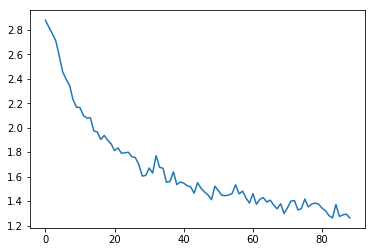

In [545]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

#### confusion matrix

In [626]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingPair()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()



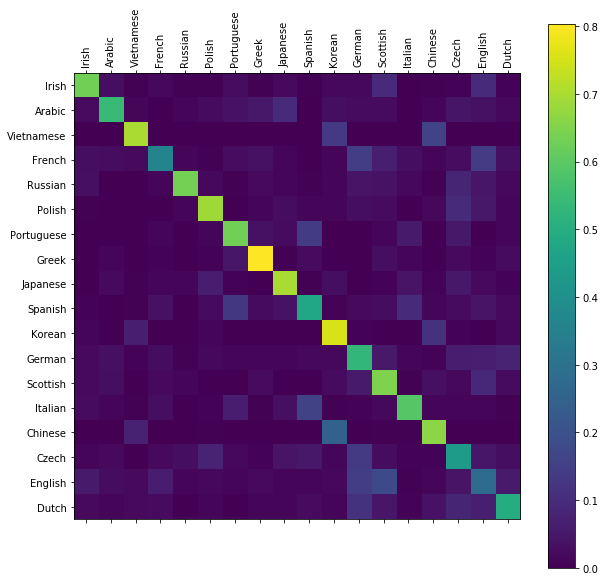

In [625]:
# Set up plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

### rnn - name generator

In [ ]:
#preprocess as above

In [85]:
import torch

In [88]:
class RNN_seq(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_seq, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories+input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories+input_size + hidden_size, output_size)#changed: n_categories + input_size + hidden_size
        self.o2o = nn.Linear(hidden_size + output_size, output_size) #new
        self.dropout = nn.Dropout(0.1) #new
        self.softmax = nn.LogSoftmax()

    def forward(self, category,input, hidden):
        combined = torch.cat((category,input, hidden), 1) #added: category
        #combined = torch.cat((category.cuda(),input.cuda(), hidden.cuda()), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output_combined=torch.cat((hidden,output),1)
        output=self.o2o(output_combined)
        output = self.dropout(output) #new
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return Variable(torch.zeros(1, self.hidden_size))

n_hidden = 128


In [17]:
# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# LongTensor of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)

In [61]:
import random

# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line

In [91]:
# Make category, input, and target tensors from a random category, line pair
def randomTrainingSet():
    category, line = randomTrainingPair()
    category_tensor = Variable(categoryTensor(category))
    input_line_tensor = Variable(inputTensor(line))
    target_line_tensor = Variable(targetTensor(line))
    return category_tensor, input_line_tensor, target_line_tensor

In [89]:
#gidi: taken from above, made chnages
learning_rate = 0.0005 # If you set this too high, it might explode. If too low, it might not learn
criterion = nn.NLLLoss()

def train(category_tensor, input_line_tensor, target_line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    #rnn.cuda()
    loss = 0

    for i in range(input_line_tensor.size()[0]):
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden)
        loss += criterion(output, target_line_tensor[i]) # gidi: loss inserted to loop
        

    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data) #why not to use step?

    return output, loss.data[0] / input_line_tensor.size()[0] #loss now averaged

In [68]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [104]:
rnn = RNN_seq(n_letters, 128, n_letters)

n_epochs = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every plot_every epochs

start = time.time()

for epoch in range(1, n_epochs + 1):
    
    output, loss = train(*randomTrainingSet())
    total_loss += loss

    if epoch % print_every == 0:
        #guess, guess_i = categoryFromOutput(output)
        print('%s (%d %d%%) %.4f' % (timeSince(start), epoch, epoch / n_epochs * 100, loss))

    if epoch % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 19s (5000 5%) 2.9952
0m 38s (10000 10%) 3.0904
0m 55s (15000 15%) 2.9603
1m 14s (20000 20%) 2.2483
1m 33s (25000 25%) 2.5218
1m 54s (30000 30%) 2.3628
2m 12s (35000 35%) 1.9165
2m 33s (40000 40%) 3.1601
2m 52s (45000 45%) 2.4524
3m 10s (50000 50%) 1.9812
3m 29s (55000 55%) 2.8681
3m 47s (60000 60%) 0.9335
4m 6s (65000 65%) 2.1624
4m 24s (70000 70%) 2.1379
4m 42s (75000 75%) 2.2411
5m 0s (80000 80%) 2.3227
5m 19s (85000 85%) 2.2965
5m 37s (90000 90%) 1.4941
5m 55s (95000 95%) 2.4878
6m 13s (100000 100%) 1.8921


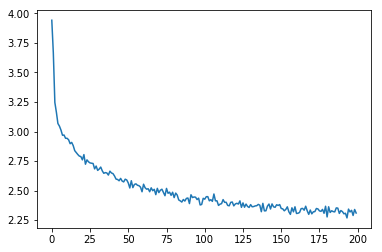

In [105]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.figure()
plt.plot(all_losses)

In [106]:
max_length = 20

# Sample from a category and starting letter
def sample(category, start_letter='A'):
    category_tensor = Variable(categoryTensor(category))
    input = Variable(inputTensor(start_letter))
    hidden = rnn.initHidden()

    output_name = start_letter

    for i in range(max_length):
        output, hidden = rnn(category_tensor, input[0], hidden)
        topv, topi = output.data.topk(1)
        topi = topi[0][0]
        if topi == n_letters - 1:
            break
        else:
            letter = all_letters[topi]
            output_name += letter
        input = Variable(inputTensor(letter))

    return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

for tag,letters in zip(['Russian','German','Spanish','Chinese'],['RUS','GER','SPA','CHI']):
    samples(tag,letters)
    print (' ')

Roveki
Uantono
Santovov
 
Gertent
Eert
Rount
 
Santer
Pares
Artan
 
Cha
Han
Iun
 


 fruther: Try with a different dataset of category -> line, for example:
 
* Fictional series -> Character name

*  Part of speech -> Word

* Country -> City

Use a “start of sentence” token so that sampling can be done without choosing a start letter

* Get better results with a bigger and/or better shaped network

* Try the nn.LSTM and nn.GRU layers

* Combine multiple of these RNNs as a higher level networ

### translation seq2seq

this is still hard for me. need to look at jeremy video again

#### preprocess

In [107]:
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()

In [124]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [129]:
# Turn a Unicode string to plain ASCII, thanks to - same as above
# http://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [127]:
def readLangs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('/mnt/data/%s-%s.txt' % (lang1, lang2)).read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

In [138]:
#filter po only short ones...

MAX_LENGTH = 10

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH and \
        p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [139]:
def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


input_lang, output_lang, pairs = prepareData('eng', 'fra', True)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10853 sentence pairs
Counting words...
Counted words:
fra 4489
eng 2925
['il va avoir un choc .', 'he s in for a shock .']


#### model

In [141]:

class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers=1):
        super(EncoderRNN, self).__init__()
        
        self.n_layers = n_layers
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output = embedded
        for i in range(self.n_layers):
            output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        result = Variable(torch.zeros(1, 1, self.hidden_size))
        if use_cuda:
            return result.cuda()
        else:
            return result

In [140]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, n_layers=1):
        super(DecoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        for i in range(self.n_layers):
            output = F.relu(output)
            output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        result = Variable(torch.zeros(1, 1, self.hidden_size))
        if use_cuda:
            return result.cuda()
        else:
            return result

In [ ]:
#the above won't be used (pitty, it coul've helped me understand) because the below would be used

In [142]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, n_layers=1, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_output, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)))
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        for i in range(self.n_layers):
            output = F.relu(output)
            output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]))
        return output, hidden, attn_weights

    def initHidden(self):
        result = Variable(torch.zeros(1, 1, self.hidden_size))
        if use_cuda:
            return result.cuda()
        else:
            return result

#### train

In [143]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]


def variableFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    result = Variable(torch.LongTensor(indexes).view(-1, 1))
    if use_cuda:
        return result.cuda()
    else:
        return result


def variablesFromPair(pair):
    input_variable = variableFromSentence(input_lang, pair[0])
    target_variable = variableFromSentence(output_lang, pair[1])
    return (input_variable, target_variable)

In [144]:
teacher_forcing_ratio = 0.5


def train(input_variable, target_variable, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_variable.size()[0]
    target_length = target_variable.size()[0]

    encoder_outputs = Variable(torch.zeros(max_length, encoder.hidden_size))
    encoder_outputs = encoder_outputs.cuda() if use_cuda else encoder_outputs

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_variable[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0][0]

    decoder_input = Variable(torch.LongTensor([[SOS_token]]))
    decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_output, encoder_outputs)
            loss += criterion(decoder_output[0], target_variable[di])
            decoder_input = target_variable[di]  # Teacher forcing

    else:
        # Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_output, encoder_outputs)
            topv, topi = decoder_output.data.topk(1)
            ni = topi[0][0]

            decoder_input = Variable(torch.LongTensor([[ni]]))
            decoder_input = decoder_input.cuda() if use_cuda else decoder_input

            loss += criterion(decoder_output[0], target_variable[di])
            if ni == EOS_token:
                break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.data[0] / target_length

In [145]:
#time helpers
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [146]:
def trainEpochs(encoder, decoder, n_epochs, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [variablesFromPair(random.choice(pairs))
                      for i in range(n_epochs)]
    criterion = nn.NLLLoss()

    for epoch in range(1, n_epochs + 1):
        training_pair = training_pairs[epoch - 1]
        input_variable = training_pair[0]
        target_variable = training_pair[1]

        loss = train(input_variable, target_variable, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if epoch % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, epoch / n_epochs),
                                         epoch, epoch / n_epochs * 100, print_loss_avg))

        if epoch % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [147]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [148]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    input_variable = variableFromSentence(input_lang, sentence)
    input_length = input_variable.size()[0]
    encoder_hidden = encoder.initHidden()

    encoder_outputs = Variable(torch.zeros(max_length, encoder.hidden_size))
    encoder_outputs = encoder_outputs.cuda() if use_cuda else encoder_outputs

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_variable[ei],
                                                 encoder_hidden)
        encoder_outputs[ei] = encoder_outputs[ei] + encoder_output[0][0]

    decoder_input = Variable(torch.LongTensor([[SOS_token]]))  # SOS
    decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    decoder_hidden = encoder_hidden

    decoded_words = []
    decoder_attentions = torch.zeros(max_length, max_length)

    for di in range(max_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
            decoder_input, decoder_hidden, encoder_output, encoder_outputs)
        decoder_attentions[di] = decoder_attention.data
        topv, topi = decoder_output.data.topk(1)
        ni = topi[0][0]
        if ni == EOS_token:
            decoded_words.append('<EOS>')
            break
        else:
            decoded_words.append(output_lang.index2word[ni])

        decoder_input = Variable(torch.LongTensor([[ni]]))
        decoder_input = decoder_input.cuda() if use_cuda else decoder_input

    return decoded_words, decoder_attentions[:di + 1]

In [149]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, attentions = evaluate(encoder, decoder, pair[0])
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

In [ ]:
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, 1, dropout_p=0.1)

In [150]:

if use_cuda:
    encoder1 = encoder1.cuda()
    attn_decoder1 = attn_decoder1.cuda()

trainEpochs(encoder1, attn_decoder1, 75000, print_every=5000)

3m 24s (- 47m 37s) (5000 6%) 2.8770
6m 38s (- 43m 7s) (10000 13%) 2.3489
9m 54s (- 39m 38s) (15000 20%) 2.0284


KeyboardInterrupt: 

#### results

In [151]:
evaluateRandomly(encoder1, attn_decoder1)

> j en ai assez de tes recriminations .
= i m sick of your complaints .
< i m tired of your your . . <EOS>

> vous etes plantee .
= you re stuck .
< you re important . <EOS>

> nous sommes des prisonnieres .
= we re prisoners .
< we re sorry . <EOS>

> elle eprouva des difficultes a se lever .
= she struggled to get up .
< she s getting to go . . <EOS>

> vous n etes pas censes fumer ici .
= you are not supposed to smoke here .
< you re not supposed to be here . <EOS>

> j ecris pour exprimer mon insatisfaction .
= i am writing to express my dissatisfaction .
< i m going for my my . . <EOS>

> nous sommes engages .
= we re committed .
< we re ready . <EOS>

> je suis fier de mon pere .
= i m proud of my father .
< i m proud of my my . <EOS>

> je ne suis pas la pour toi .
= i m not here for you .
< i m not here for you . <EOS>

> je ne vais pas perdre .
= i m not going to lose .
< i m not going . <EOS>



### topics

#### preprocess reuters

In [3]:
from keras.datasets import reuters
import numpy as np
from keras.preprocessing import sequence

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.pkl") #already tokenized and stuff
idx = reuters.get_word_index()
idx_arr = sorted(idx, key=idx.get)


In [4]:
vocab_size = 5000

trn = [np.array([i if i<vocab_size-1 else vocab_size-1 for i in s]) for s in x_train]
test = [np.array([i if i<vocab_size-1 else vocab_size-1 for i in s]) for s in x_test]

In [5]:
reuters_seq_len = 500

reuters_trn = sequence.pad_sequences(trn, maxlen=reuters_seq_len, value=0)
reuters_test = sequence.pad_sequences(test, maxlen=reuters_seq_len, value=0)

In [9]:
output_cats=len(np.unique(y_train))

#### models - LSTM - keras

In [11]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Embedding,Dense
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical

In [7]:
input_dim=500
output_dim=50 #embedding dim

In [10]:
model= Sequential([
    Embedding(vocab_size, output_dim,input_length=500, mask_zero=True,
              W_regularizer=l2(1e-6), dropout=0.2),
    LSTM(100, consume_less='gpu'),
    Dense(output_cats, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(reuters_trn, to_categorical(y_train), validation_data=(reuters_test, to_categorical(y_test)), nb_epoch=8, batch_size=64)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:91: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/8
8982/8982 [==============================] - 190s - loss: 2.5466 - acc: 0.3507 - val_loss: 2.0955 - val_acc: 0.4795
Epoch 2/8
8982/8982 [==============================] - 187s - loss: 2.2062 - acc: 0.4393 - val_loss: 2.4346 - val_acc: 0.3255
Epoch 3/8
8982/8982 [==============================] - 190s - loss: 1.9828 - acc: 0.4767 - val_loss: 1.9019 - val_acc: 0.5125
Epoch 4/8
8982/8982 [==============================] - 188s - loss: 1.8731 - acc: 0.5278 - val_loss: 1.8080 - val_acc: 0.5530
Epoch 5/8
8982/8982 [==============================] - 189s - loss: 1.7774 - acc: 0.5395 - val_loss: 1.7334 - val_acc: 0.5686
Epoch 6/8
8982/8982 [==============================] - 187s - loss: 1.7267 - acc: 0.5586 - val_loss: 1.6830 - val_acc: 0.5752
Epoch 7/8
8982/8982 [==============================] - 190s - loss: 1.7135 - acc: 0.5599 - val_loss: 1.7225 - val_acc: 0.5534
Epoch 8/8
8982/8982 [==============================] - 190s - loss: 1.

In [15]:
model.fit(reuters_trn, to_categorical(y_train), validation_data=(reuters_test, to_categorical(y_test)), nb_epoch=2, batch_size=64)

Train on 8982 samples, validate on 2246 samples
Epoch 1/2
8982/8982 [==============================] - 188s - loss: 1.5082 - acc: 0.6215 - val_loss: 1.5802 - val_acc: 0.6046
Epoch 2/2
8982/8982 [==============================] - 191s - loss: 1.5438 - acc: 0.6151 - val_loss: 1.5568 - val_acc: 0.6144


In [ ]:
#now write this in pytorch... form scracth? no.. use the rnn first